In [1]:
import numpy
from matplotlib import pyplot
# помещаем рисунки в блокнот
%matplotlib inline



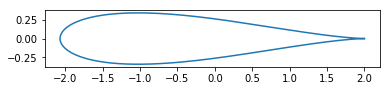

In [2]:
def zhukovsky_function(z, c=1):
    return z+c**2/z

fi = numpy.linspace(0, 2*numpy.pi, 1000)
r = 1.15 #(numpy.sqrt((1 + 0.1)**2 + 0.1**2))
a = r*numpy.cos(fi) - 0.15
b = r*numpy.sin(fi) 
z = a + b * 1j 
#pyplot.figure(figsize=(20,5))
pyplot.axes(aspect='equal')
pyplot.plot(zhukovsky_function(z).real,zhukovsky_function(z).imag);
#pyplot.scatter(zhukovsky_function(z0).real,zhukovsky_function(z0).imag, s=80);


In [3]:
fi_start, fi_end = 0, numpy.pi*2  # fi
r_start, r_end = 1.15, 5        # r
fi = numpy.linspace(fi_start, fi_end, 145)    # создаем одномерный массив x
r = numpy.linspace(r_start, r_end, 100)    # создаем одномерный массив y 
R, Fi = numpy.meshgrid(r, fi)
X = R*numpy.cos(Fi) - 0.15
Y = R*numpy.sin(Fi)
Z = X + Y*1j

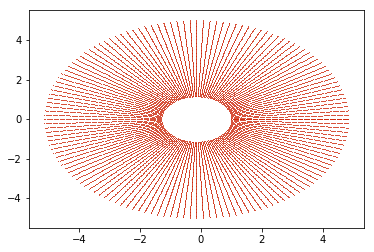

In [4]:
pyplot.scatter(X, Y, s=1, color='#CD2305', marker='o', linewidth=0);

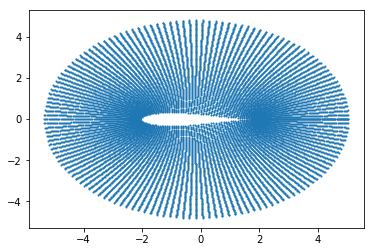

In [5]:
pyplot.scatter(zhukovsky_function(Z).real,zhukovsky_function(Z).imag, s=1);

In [6]:
import math
u_inf = 1
x_doublet, y_doublet = -0.15, 0.0
kappa = 2*numpy.pi*1.15**2
def get_velocity(strength, xs, ys, X, Y):
    
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v
def get_velocity_doublet(strength, xd, yd, X, Y):
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/\
    ((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/\
    ((X-xd)**2+(Y-yd)**2)**2
    
    return u, v
def get_stream_function_doublet(strength, xd, yd, X, Y):
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet,\
                                          X, Y)
psi_freestream = u_inf * Y
psi = psi_freestream + psi_doublet

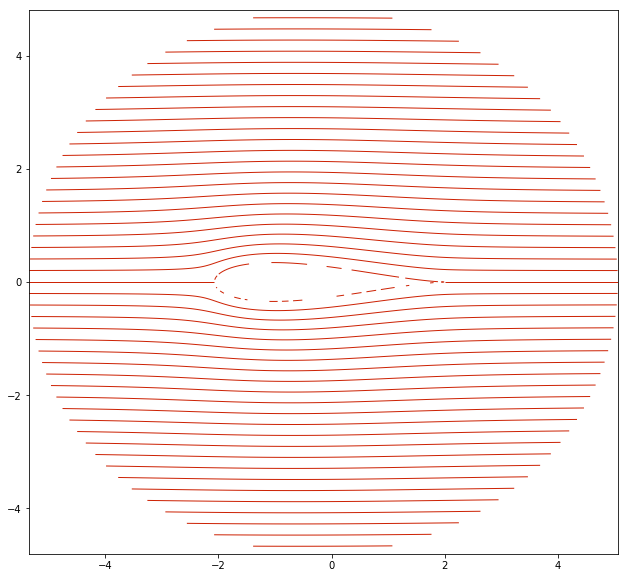

In [7]:
import math
u_inf = 1.0
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet,\
                                            X, Y)

#z = u_doublet + v_doublet*1j
u_doublet+=u_inf
pyplot.figure(figsize=(40,10))
pyplot.axes(aspect='equal')
Ksi = zhukovsky_function(X+Y*1j)
pyplot.contour(Ksi.real, Ksi.imag, psi,51, colors = '#CD2305', linewidths = 1, linestyles = 'solid');


In [8]:
W =(u_doublet - v_doublet*1j)/(1-1/Z**2)

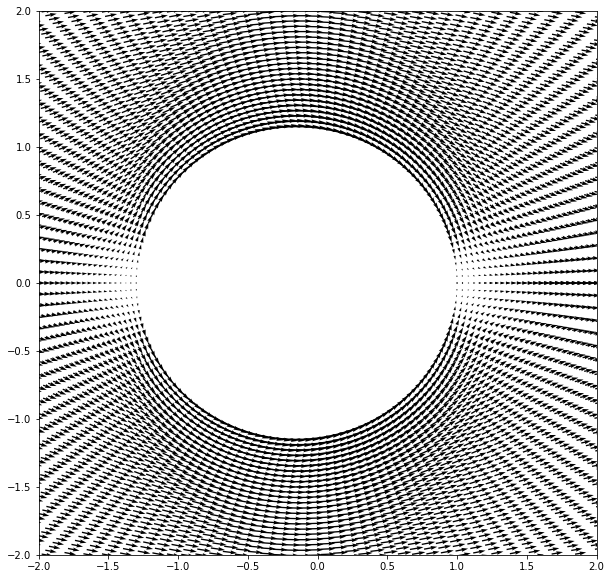

In [9]:
pyplot.figure(figsize=(10,10))

pyplot.xlim(-2, 2)
pyplot.ylim(-2, 2)
pyplot.quiver(X,Y, u_doublet, v_doublet, scale=50);

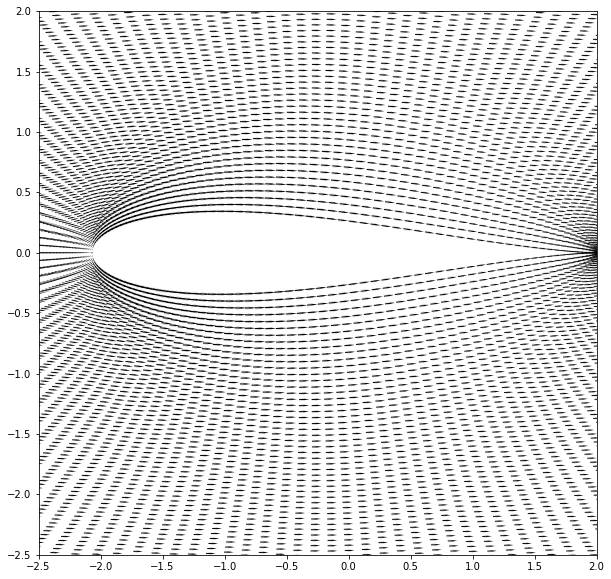

In [10]:
pyplot.figure(figsize=(10,10))

pyplot.xlim(-2.5, 2)
pyplot.ylim(-2.5, 2)
pyplot.quiver(Ksi.real,Ksi.imag, W.real, -W.imag, scale=60, headlength = 10);

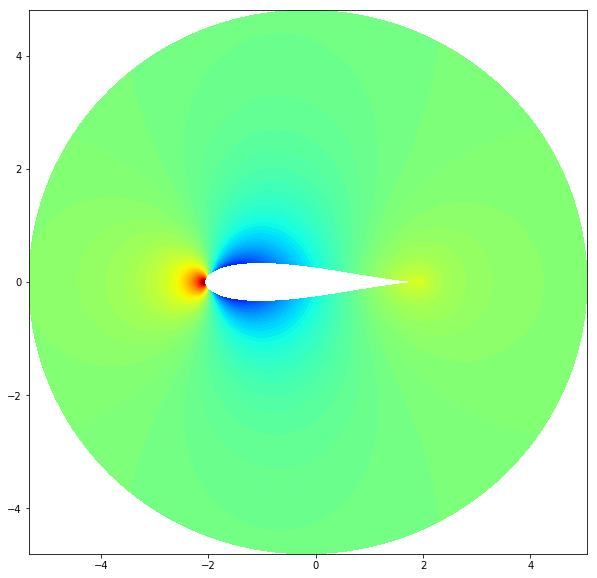

In [11]:
cp = 1.0 - (W.real**2+W.imag**2)/1**2
pyplot.figure(figsize=(10,10))

contf = pyplot.contourf(Ksi.real,Ksi.imag, cp, levels=numpy.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='jet')

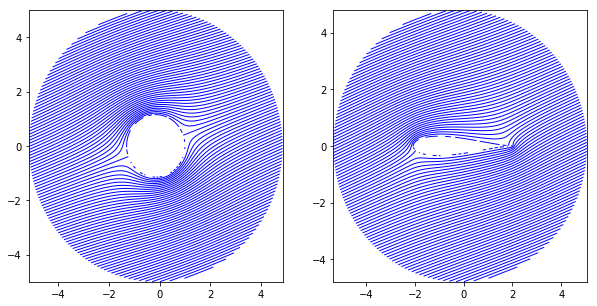

In [12]:
aoa = -20*numpy.pi/180

fi_start, fi_end = 0, numpy.pi*2  # fi
r_start, r_end = 1.15, 5        # r
fi = numpy.linspace(fi_start, fi_end, 145)    # создаем одномерный массив x
r = numpy.linspace(r_start, r_end, 100)    # создаем одномерный массив y 
R, Fi = numpy.meshgrid(r, fi)
X = R*numpy.cos(Fi)
Y = R*numpy.sin(Fi)
Z = X + Y*1j

Ksi = zhukovsky_function(X+Y*1j)
_X = X*numpy.cos(aoa) + Y*numpy.sin(aoa) - 0.15
_Y = -X*numpy.sin(aoa) + Y*numpy.cos(aoa)

_Z = _X + 1j * _Y

#x_doublet, y_doublet = 0.0, 0.0
#kappa = 2*numpy.pi*1.15**2
#psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet,\
#                                          X, Y)
#psi_freestream = u_inf * Y
#psi = psi_freestream + psi_doublet

_Ksi = zhukovsky_function(_X+_Y*1j)

figure, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(10,5))

ax1.contour(_X, _Y, psi,100, colors = 'b', linewidths = 1, linestyles = 'solid');
ax2.contour(_Ksi.real, _Ksi.imag, psi,100, colors = 'b', linewidths = 1, linestyles = 'solid');

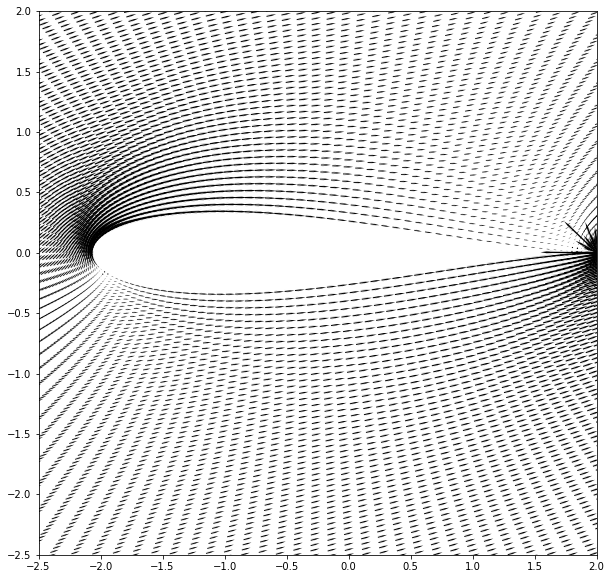

In [13]:
W =(u_doublet - v_doublet*1j)#/(1-1/_Z**2)

pyplot.figure(figsize=(10,10));
pyplot.xlim(-2.5, 2)
pyplot.ylim(-2.5, 2)

_W = W*numpy.exp(1j*aoa) 

_W_p =(_W)/(1-1/_Z**2)

pyplot.quiver(_Ksi.real, _Ksi.imag, _W_p.real, -_W_p.imag, scale=60, headlength = 10);

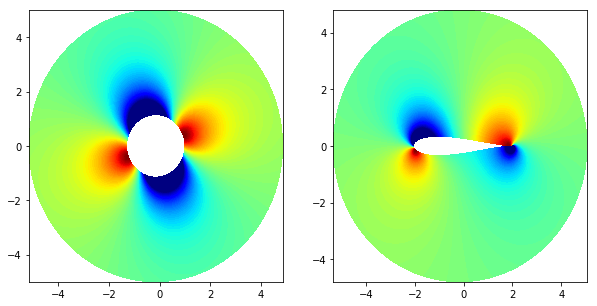

In [14]:
#W =(u_doublet - v_doublet*1j)/(1-1/_Z**2)*numpy.exp(1j*aoa)
_cp = 1.0 - (_W.real**2 + _W.imag**2)/1**2 

_cp_p = 1.0 - (_W_p.real**2+_W_p.imag**2)/1**2
figure, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(10,5))

ax1.contourf(_X, _Y, _cp, levels=numpy.linspace(-1,1, 100),\
                        extend='both', cmap='jet');
ax2.contourf(_Ksi.real, _Ksi.imag, _cp_p, levels=numpy.linspace(-1,1, 100),\
                        extend='both', cmap='jet');

In [36]:
"""x_stagn1, y_stagn1 = +math.sqrt(R**2-(gamma/(4*math.pi*u_inf))**2),\
-gamma/(4*math.pi*u_inf)"""
gamma = -numpy.sin(aoa)*4*numpy.pi*1.15

In [37]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    u = + strength/(2*numpy.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*numpy.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength/(4*numpy.pi)*numpy.log((X-xv)**2+(Y-yv)**2) 
    return psi

In [38]:
u_vortex, v_vortex = get_velocity_vortex(gamma, -0.15, 0, _X, _Y)
psi_vortex = get_stream_function_vortex(gamma, -0.15, 0, _X, _Y)

In [52]:
_u_vu = _W.real + u_vortex
_v_vu = - _W.imag + v_vortex
psi_v = psi + psi_vortex

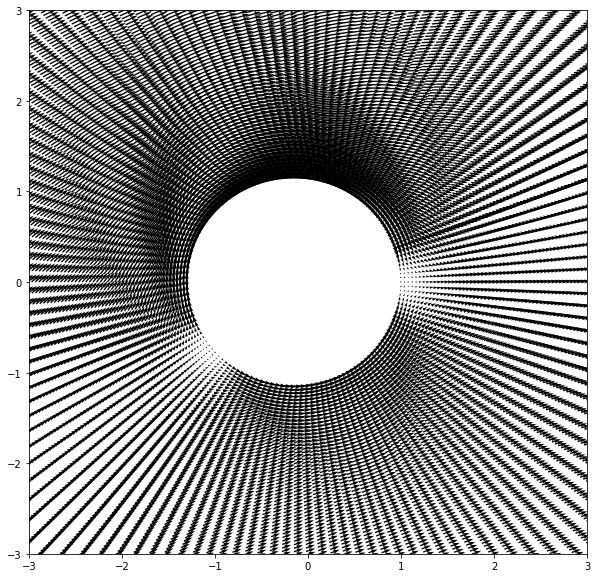

In [53]:
pyplot.figure(figsize=(10,10))
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)

pyplot.quiver(_X, _Y, _u_vu, _v_vu, scale=50);

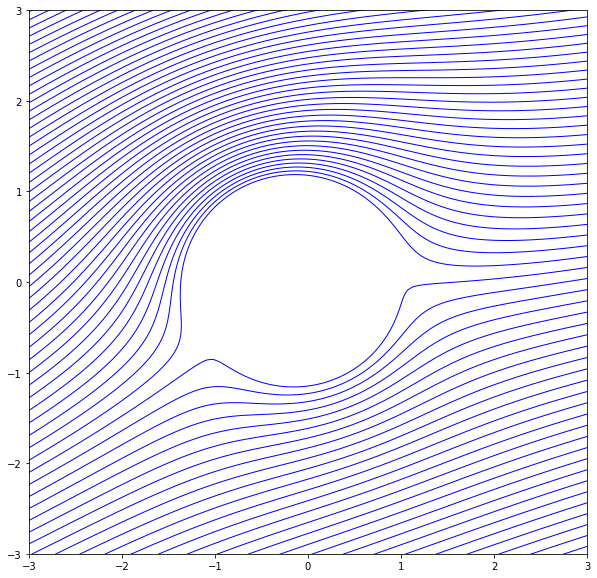

In [54]:
pyplot.figure(figsize=(10,10))
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.contour(_X, _Y, psi_v, 100, colors = 'b', linewidths = 1, linestyles = 'solid');

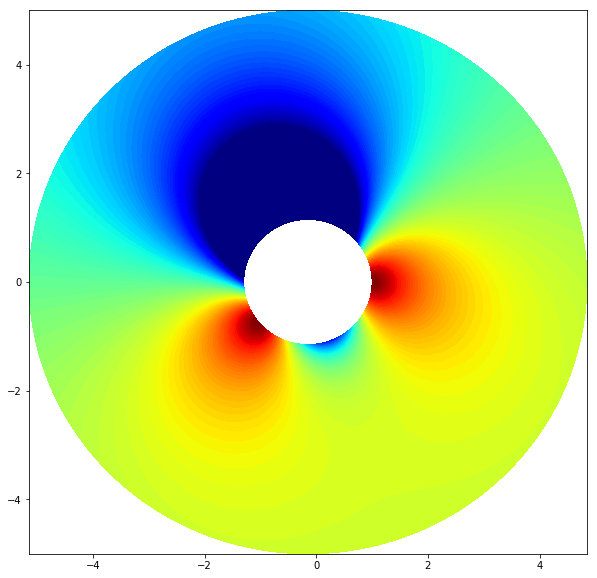

In [55]:
_cp_v = 1.0 - (_u_vu**2+_v_vu**2)/1**2
pyplot.figure(figsize=(10,10))

pyplot.contourf(_X,_Y, _cp_v, levels=numpy.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='jet');

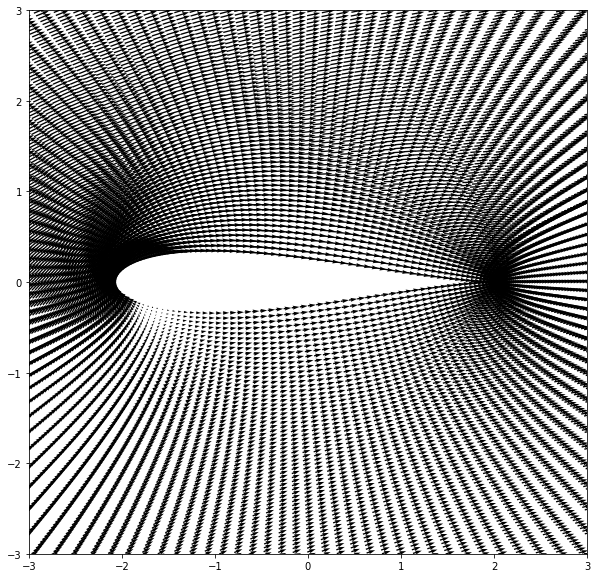

In [56]:
_W_v = (_u_vu - 1j * _v_vu)/(1-1/_Z**2)
pyplot.figure(figsize=(10,10))
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.quiver(_Ksi.real, _Ksi.imag, _W_v.real, -_W_v.imag, scale=50);

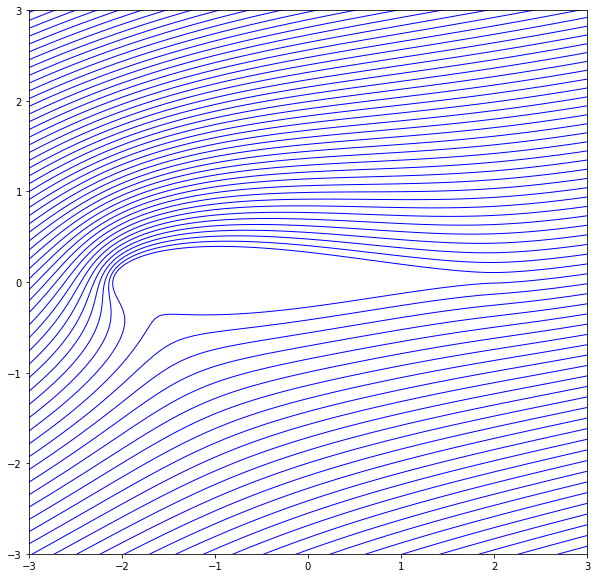

In [57]:
pyplot.figure(figsize=(10,10))
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.contour(_Ksi.real, _Ksi.imag, psi_v, 100, colors = 'b', linewidths = 1, linestyles = 'solid');

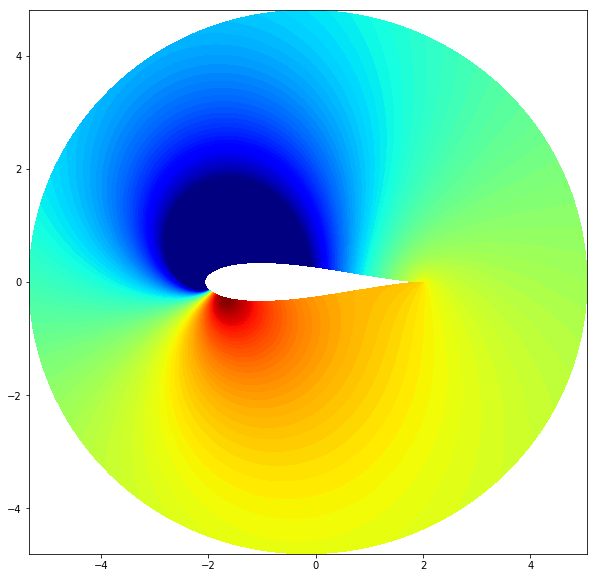

In [59]:
_cp_v_p = 1.0 - (_W_v.real**2+_W_v.imag**2)/1**2
pyplot.figure(figsize=(10,10))

pyplot.contourf(_Ksi.real, _Ksi.imag, _cp_v_p, levels=numpy.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='jet');

In [72]:
fi_s = numpy.linspace(0, 2 * numpy.pi, 145)
F_x = 0
F_y = 0
for i in range (0, round(145 / 2)):
    F_x += (_Ksi.imag[i + 1][0] - _Ksi.imag[i][0]) * (_cp_v_p[i][0] + _cp_v_p[-i][0] + _cp_v_p[i + 1][0] + _cp_v_p[- i + 1][0]) / 2
    F_y += (_Ksi.real[i + 1][0] - _Ksi.real[i][0]) * (_cp_v_p[i][0] - _cp_v_p[-i][0] + _cp_v_p[i + 1][0] - _cp_v_p[- i + 1][0]) / 2
    print('F_x = ', (F_x * numpy.cos(aoa) + F_y * numpy.sin(aoa))/2, " = 0")
print('F_y = ', (-F_x * numpy.sin(aoa) + F_y * numpy.cos(aoa))/2)

F_x =  -0.030481967490558093  = 0
F_y =  4.607013394704324


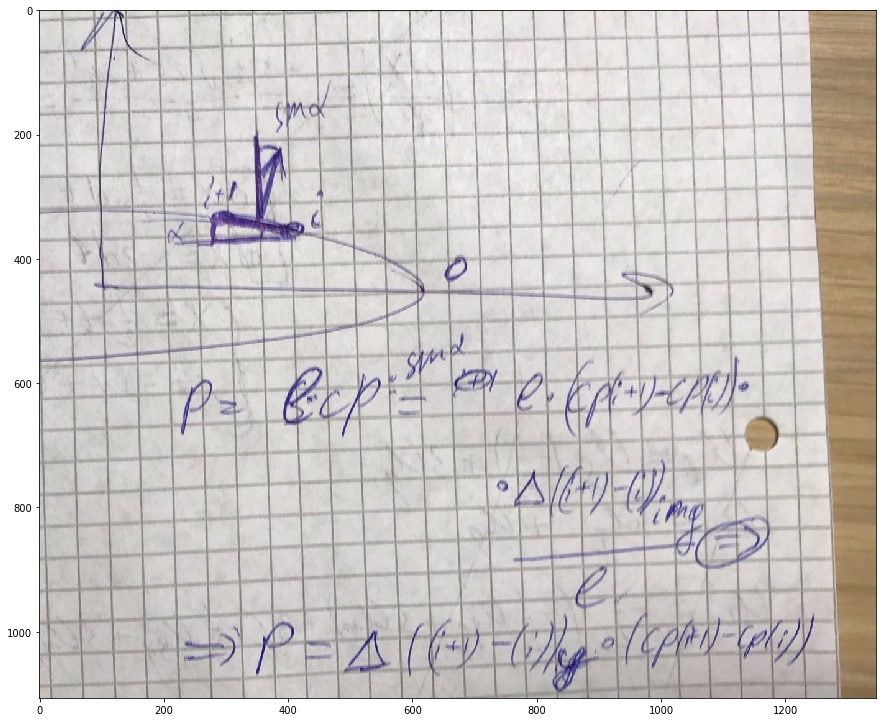

In [80]:
import matplotlib.image as mpimg
img=mpimg.imread('Solution.jpg')
pyplot.figure(figsize=(15,15))
imgplot = pyplot.imshow(img)